# Nelaturi_MahemaReddy_HW8

##### Name: Mahema Reddy Nelaturi 
##### Github Username: mahemareddy
##### USCID: 2814429305

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.model_selection import StratifiedKFold
import random
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [2]:
import warnings
warnings.filterwarnings("ignore")

### (a)Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+ %28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/ machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes

In [3]:
data=pd.read_csv('../data/wdbc.data', header=None)

In [4]:
data=data.drop(columns=[0])

In [5]:
data

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
data_M=data[data[1]=='M']

In [7]:
data_M

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [8]:
data_B=data[data[1]=='B']

In [9]:
data_B

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,B,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [10]:
X_M=data_M.iloc[:,1:]
X_B=data_B.iloc[:,1:]
Y_M=pd.DataFrame(data_M.iloc[:,0])
Y_B=pd.DataFrame(data_B.iloc[:,0])

In [11]:
X_M

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [12]:
Y_M

,1
0,M
1,M
2,M
3,M
4,M
...,...
563,M
564,M
565,M
566,M


In [13]:
accuracy_train=[]
F1_score_train=[]
precision_train=[]
recall_train=[]
AUC_train=[]

In [14]:
accuracy_test=[]
F1_score_test=[]
precision_test=[]
recall_test=[]
AUC_test=[]

In [15]:
def TEST_TRAIN_SPLIT(X_M, Y_M, X_B, Y_B, TestSize):
    X_train=pd.DataFrame()
    X_test=pd.DataFrame()
    Y_train=pd.DataFrame()
    Y_test=pd.DataFrame()
    X_train_M, X_test_M, Y_train_M, Y_test_M = train_test_split(X_M, Y_M, test_size=TestSize)
    X_train_B, X_test_B, Y_train_B, Y_test_B = train_test_split(X_B, Y_B, test_size=TestSize)
    X_train=pd.concat([X_train_M, X_train_B], ignore_index=True, sort=False)
    X_test=pd.concat([X_test_M, X_test_B], ignore_index=True, sort=False)
    Y_train=pd.concat([Y_train_M, Y_train_B], ignore_index=True, sort=False)
    Y_test=pd.concat([Y_test_M, Y_test_B], ignore_index=True, sort=False)
    return X_train, X_test, Y_train, Y_test     

In [16]:
for i in range(0,30):
    X_train, X_test, Y_train, Y_test = TEST_TRAIN_SPLIT(X_M, Y_M, X_B, Y_B, 0.2)

    Y_train=LabelEncoder().fit_transform(Y_train.values.ravel())
    Y_test=LabelEncoder().fit_transform(Y_test.values.ravel())

    X_train_norm=MinMaxScaler().fit_transform(X_train)
    X_test_norm=MinMaxScaler().fit_transform(X_test)

    param_grid_SVM={
    'C':np.logspace(-3,6,10),
    }
    gridSVM_L1 = GridSearchCV(estimator=LinearSVC(penalty='l1', loss='squared_hinge', dual=False, max_iter=100000), param_grid=param_grid_SVM, cv=5)
    gridSVM_L1.fit(X_train_norm, Y_train)
    y_pred_train=gridSVM_L1.predict(X_train_norm)
    y_pred_test=gridSVM_L1.predict(X_test_norm)
    
    accuracy_train.append(accuracy_score(Y_train, y_pred_train))
    accuracy_test.append(accuracy_score(Y_test, y_pred_test))
    
    precision_train.append(precision_score(Y_train, y_pred_train))
    precision_test.append(precision_score(Y_test, y_pred_test))
    
    recall_train.append(recall_score(Y_train, y_pred_train))
    recall_test.append(recall_score(Y_test, y_pred_test))
    
    F1_score_train.append(f1_score(Y_train, y_pred_train))
    F1_score_test.append(f1_score(Y_test, y_pred_test))
    
    fpr, tpr, thresholds = roc_curve(Y_train, y_pred_train, pos_label=1)
    AUC_train.append(auc(fpr, tpr))
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_test, pos_label=1)
    AUC_test.append(auc(fpr, tpr))

In [17]:
train_sup_learn =sum(accuracy_train)/30
test_sup_learn = sum(accuracy_test)/30
print("train results:")
print("The accuracy is", train_sup_learn)
print("The F1 score is", sum(F1_score_train)/30)
print("The precision is", sum(precision_train)/30)
print("The recall is", sum(recall_train)/30)
print("The AUC is", sum(AUC_train)/30)
print("test results:")
print("The accuracy is", test_sup_learn)
print("The F1 score is", sum(F1_score_test)/30)
print("The precision is", sum(precision_test)/30)
print("The recall is", sum(recall_test)/30)
print("The AUC is", sum(AUC_test)/30)

train results:
The accuracy is 0.9835535976505144
The F1 score is 0.97764342229966
The precision is 0.9889342407907732
The recall is 0.9666666666666665
The AUC is 0.9801169590643275
test results:
The accuracy is 0.9127536231884058
The F1 score is 0.9015538655095102
The precision is 0.8471836076918657
The recall is 0.9790697674418603
The AUC is 0.9261089577950042


In [18]:
print("Confusion matrix for train data\n", confusion_matrix(Y_train, y_pred_train))
print("Confusion matrix for train data\n", confusion_matrix(Y_test, y_pred_test))

Confusion matrix for train data
 [[283   2]
 [  6 163]]
Confusion matrix for train data
 [[69  3]
 [ 1 42]]


The ROC Curve for train data:


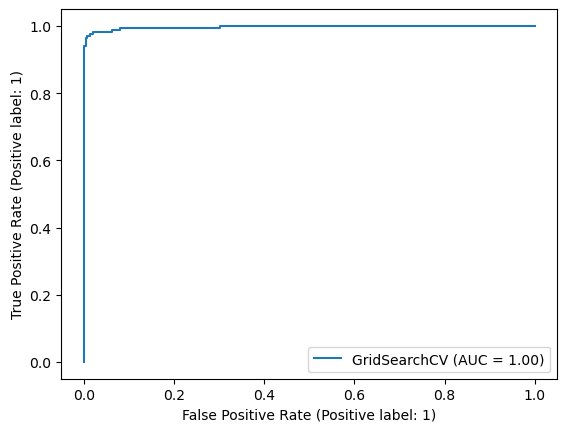

In [19]:
print("The ROC Curve for train data:")
RocCurveDisplay.from_estimator(gridSVM_L1, X_train_norm, Y_train)

The ROC Curve for test data:


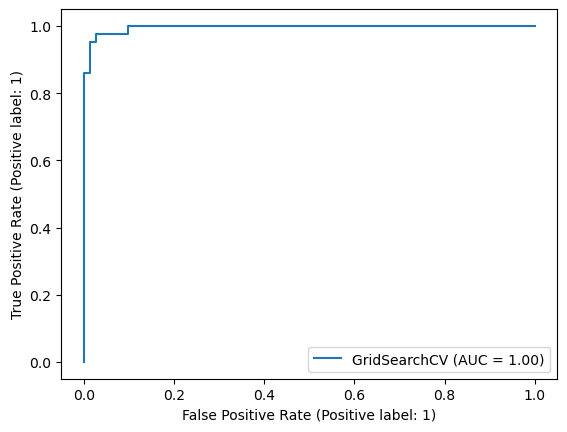

In [20]:
print("The ROC Curve for test data:")
RocCurveDisplay.from_estimator(gridSVM_L1, X_test_norm, Y_test)

### ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly

In [21]:
accuracy_train=[]
F1_score_train=[]
precision_train=[]
recall_train=[]
AUC_train=[]

In [22]:
accuracy_test=[]
F1_score_test=[]
precision_test=[]
recall_test=[]
AUC_test=[]

In [24]:
for i in range(0,30):

    X_train, X_test, Y_train, Y_test = TEST_TRAIN_SPLIT(X_M, Y_M, X_B, Y_B, 0.2)
    
    X_train_labelled, X_train_unlabelled, Y_train_labelled, Y_train_unlabelled = TEST_TRAIN_SPLIT(X_train[Y_train[1]=='M'], Y_train[Y_train[1]=='M'], X_train[Y_train[1]=='B'], Y_train[Y_train[1]=='B'], 0.5)
    
    Y_train_labelled=LabelEncoder().fit_transform(Y_train_labelled.values.ravel())
    Y_test=LabelEncoder().fit_transform(Y_test.values.ravel())
    
    X_train_norm_labelled=MinMaxScaler().fit_transform(X_train_labelled)
    X_train_norm_unlabelled=MinMaxScaler().fit_transform(X_train_unlabelled)
    X_test_norm=MinMaxScaler().fit_transform(X_test)
    
    param_grid_SVM={
    'C':[0.01,0.1,1,10],
    }
    gridSVM_L1 = GridSearchCV(estimator=LinearSVC(penalty='l1', loss='squared_hinge', dual=False, max_iter=100000), param_grid=param_grid_SVM, cv=5)
    gridSVM_L1.fit(X_train_norm_labelled, Y_train_labelled)
    
    while len(X_train_norm_unlabelled)!=0:
        distance_X=gridSVM_L1.decision_function(X_train_norm_unlabelled)
        y_label=gridSVM_L1.predict(X_train_norm_unlabelled[np.where(distance_X==max(distance_X))])
        X_train_norm_labelled=np.vstack((X_train_norm_labelled, X_train_norm_unlabelled[np.where(distance_X==max(distance_X))]))
        Y_train_labelled=np.append(Y_train_labelled, y_label)
        gridSVM_L1.fit(X_train_norm_labelled, Y_train_labelled)
        X_train_norm_unlabelled=np.delete(X_train_norm_unlabelled, np.where(distance_X==max(distance_X)), axis=0)
    y_pred_train=gridSVM_L1.predict(X_train_norm_labelled)
    y_pred_test=gridSVM_L1.predict(X_test_norm)
    
    accuracy_train.append(accuracy_score(Y_train_labelled, y_pred_train))
    accuracy_test.append(accuracy_score(Y_test, y_pred_test))
    
    precision_train.append(precision_score(Y_train_labelled, y_pred_train))
    precision_test.append(precision_score(Y_test, y_pred_test))
    
    recall_train.append(recall_score(Y_train_labelled, y_pred_train))
    recall_test.append(recall_score(Y_test, y_pred_test))
    
    F1_score_train.append(f1_score(Y_train_labelled, y_pred_train))
    F1_score_test.append(f1_score(Y_test, y_pred_test))
    
    fpr, tpr, thresholds = roc_curve(Y_train_labelled, y_pred_train, pos_label=1)
    AUC_train.append(auc(fpr, tpr))
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_test, pos_label=1)
    AUC_test.append(auc(fpr, tpr))
    train_accuracy = accuracy_score(Y_train_labelled, y_pred_train)
    test_accuracy = accuracy_score(Y_test, y_pred_test)
    print("iteration:", i)      
    print("Train Accuracy", train_accuracy)
    print("Test Accuracy:", test_accuracy)


iteration: 0
Train Accuracy 0.973568281938326
Test Accuracy: 0.4608695652173913
iteration: 1
Train Accuracy 0.9801762114537445
Test Accuracy: 0.9130434782608695
iteration: 2
Train Accuracy 0.9977973568281938
Test Accuracy: 0.6086956521739131
iteration: 3
Train Accuracy 0.9757709251101322
Test Accuracy: 0.6782608695652174
iteration: 4
Train Accuracy 0.9757709251101322
Test Accuracy: 0.6260869565217392
iteration: 5
Train Accuracy 0.9801762114537445
Test Accuracy: 0.6608695652173913
iteration: 6
Train Accuracy 0.9889867841409692
Test Accuracy: 0.7478260869565218
iteration: 7
Train Accuracy 1.0
Test Accuracy: 0.591304347826087
iteration: 8
Train Accuracy 0.9911894273127754
Test Accuracy: 0.6
iteration: 9
Train Accuracy 0.960352422907489
Test Accuracy: 0.808695652173913
iteration: 10
Train Accuracy 0.9845814977973568
Test Accuracy: 0.6521739130434783
iteration: 11
Train Accuracy 0.986784140969163
Test Accuracy: 0.808695652173913
iteration: 12
Train Accuracy 0.986784140969163
Test Accuracy: 

In [25]:
train_semi_sup = sum(accuracy_train)/30
test_semi_sup = sum(accuracy_test)/30
print("train results:")
print("The accuracy is", train_semi_sup)
print("The F1 score is", sum(F1_score_train)/30)
print("The precision is", sum(precision_train)/30)
print("The recall is", sum(recall_train)/30)
print("The AUC is", sum(AUC_train)/30)
print("test results:")
print("The accuracy is", test_semi_sup)
print("The F1 score is", sum(F1_score_test)/30)
print("The precision is", sum(precision_test)/30)
print("The recall is", sum(recall_test)/30)
print("The AUC is", sum(AUC_test)/30)

train results:
The accuracy is 1.0805433186490458
The F1 score is 1.0835758735732905
The precision is 1.0874189722372178
The recall is 1.0801429553120692
The AUC is 1.078993547285115
test results:
The accuracy is 0.7672463768115944
The F1 score is 0.7986459264030026
The precision is 0.6654949143791389
The recall is 1.0666666666666667
The AUC is 0.8275462962962961


In [26]:
print("Confusion matrix for train data\n", confusion_matrix(Y_train_labelled, y_pred_train))
print("Confusion matrix for train data\n", confusion_matrix(Y_test, y_pred_test))

Confusion matrix for train data
 [[139   7]
 [  5 303]]
Confusion matrix for train data
 [[10 62]
 [ 0 43]]


The ROC Curve for test data:


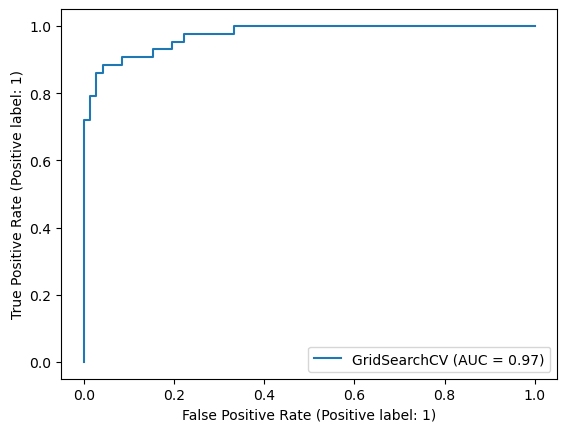

In [27]:
print("The ROC Curve for test data:")
RocCurveDisplay.from_estimator(gridSVM_L1, X_test_norm, Y_test)

#### iii.Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.


In [28]:
y=LabelEncoder().fit_transform(data.iloc[:, 0])

In [29]:
train_accuracy=0
test_accuracy=0
train_f1_score=0
test_f1_score=0
train_precision_score=0
test_precision_score=0
train_recall_score=0
test_recall_score=0
train_roc_auc_score=0
test_roc_auc_score=0

In [30]:
len(y)

569

In [31]:
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], y, test_size=0.2, shuffle=True, stratify=y)

    X_train_norm=MinMaxScaler().fit_transform(X_train)
    X_test_norm=MinMaxScaler().fit_transform(X_test)

    y_train=pd.DataFrame(y_train)

    kmeans=KMeans(n_clusters=2, random_state=random.randint(0,100)).fit(X_train_norm)

    neighbours = NearestNeighbors(n_neighbors=30).fit(X_train_norm)
    distances, indices = neighbours.kneighbors(kmeans.cluster_centers_)

    polling_0=list(dict(y_train.loc[indices[0]].value_counts()).keys())[0][0]
    polling_1=list(dict(y_train.loc[indices[1]].value_counts()).keys())[0][0]

    pred = pd.DataFrame(kmeans.labels_)
    pred_0=pred[pred[0]==0]
    pred_1=pred[pred[0]==1]
    pred_0['y']=polling_0
    pred_1['y']=polling_1
    train_pred=pd.concat([pred_0['y'],pred_1['y']],axis=0)

    train_pred = train_pred.sort_index()
    test_pred = kmeans.predict(X_test_norm)
    train_accuracy=train_accuracy+accuracy_score(train_pred, y_train)
    test_accuracy=test_accuracy+accuracy_score(test_pred, y_test)
    train_precision_score=train_precision_score+precision_score(y_train, train_pred, average=None)
    test_precision_score=test_precision_score+precision_score(y_test, test_pred, average=None)
    train_recall_score=train_recall_score+recall_score(y_train, train_pred, average=None)
    test_recall_score=test_recall_score+recall_score(y_test, test_pred, average=None)
    train_f1_score=train_f1_score+f1_score(y_train, train_pred, average=None)
    test_f1_score=test_f1_score+f1_score(y_test, test_pred, average=None)
    fpr, tpr, _ = roc_curve(y_train, train_pred)
    train_roc_auc_score=train_roc_auc_score+auc(fpr, tpr)
    fpr, tpr, _ = roc_curve(y_test, test_pred)
    test_roc_auc_score=test_roc_auc_score+auc(fpr, tpr)
    print("iteration: ", i)

iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29


In [32]:
train_unsup_learn = train_accuracy/(i+1)
test_unsup_learn = test_accuracy/(i+1)

print('Average Training Accuracy: ',train_unsup_learn)
print('Average Test Acuracy: ',test_unsup_learn)

print('Average Training Precision-Score: ',train_precision_score/(i+1))
print('Average Test Precision-Score: ',test_precision_score/(i+1))

print('Average Training Recall-Score: ',train_recall_score/(i+1))
print('Average Test Recall-Score: ',test_recall_score/(i+1))

print('Average Training F1-Score: ',train_f1_score/(i+1))
print('Average Test F1-Score: ',test_f1_score/(i+1))

print('Average Training AUC: ',train_roc_auc_score/(i+1))
print('Average Test AUC: ',test_roc_auc_score/(i+1))

Average Training Accuracy:  0.923882783882784
Average Test Acuracy:  0.6388888888888888
Average Training Precision-Score:  [0.91388944 0.9441515 ]
Average Test Precision-Score:  [0.67051234 0.60347789]
Average Training Recall-Score:  [0.96994152 0.84666667]
Average Test Recall-Score:  [0.63518519 0.6452381 ]
Average Training F1-Score:  [0.94104279 0.89260748]
Average Test F1-Score:  [0.65042928 0.6211997 ]
Average Training AUC:  0.9083040935672512
Average Test AUC:  0.6402116402116403



ROC curve for Training data: 



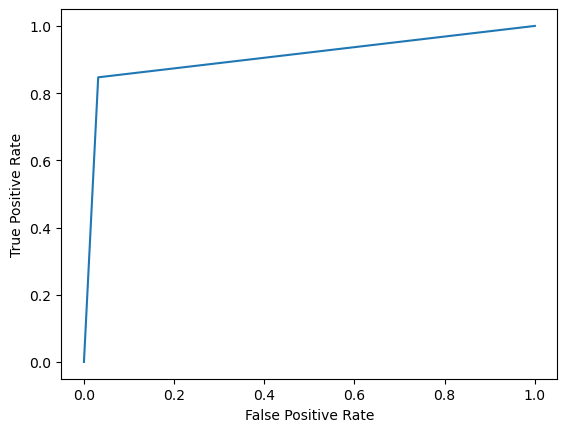

In [33]:
print('\nROC curve for Training data: \n')
fpr, tpr, _ = roc_curve(y_train, train_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


ROC curve for Test data: 



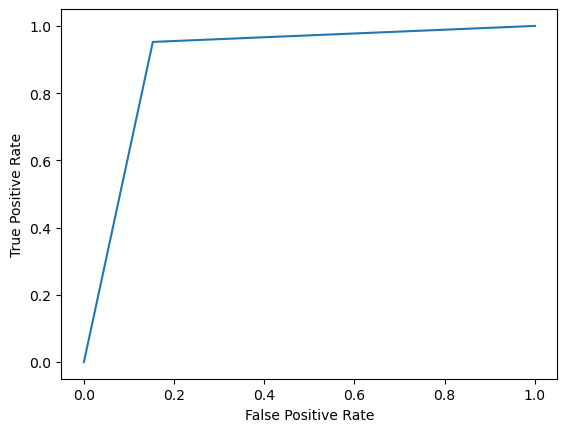

In [34]:
print('\nROC curve for Test data: \n')
fpr, tpr, _ = roc_curve(y_test, test_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [35]:
print('\nTraining Confusion Matrix\n')
confusion_matrix(y_train, train_pred)


Training Confusion Matrix



array([[276,   9],
       [ 26, 144]])

In [36]:
print('\nTest Confusion Matrix\n')
confusion_matrix(y_test, test_pred)


Test Confusion Matrix



array([[61, 11],
       [ 2, 40]])

### iv. Spectral Clustering : Repeat 1(b)iii using spectral clustering, which is clus- tering based on kernels.  Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members).
Do not label data based on their proximity to cluster center, because spectral
clustering may give you non-convex clusters . Instead, use
fit predict
method.

Spectral clustering is a technique for grouping data points based on their similarity. It works by creating a graph from the data, finding the graph's structure using eigenvalues and eigenvectors, and then clustering the data based on this structure. It's good at handling complex shapes and high-dimensional data but can be computationally expensive and requires parameter tuning.

In [37]:
train_accuracy=0
test_accuracy=0
train_f1_score=0
test_f1_score=0
train_precision_score=0
test_precision_score=0
train_recall_score=0
test_recall_score=0
train_roc_auc_score=0
test_roc_auc_score=0

In [38]:
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 2:], y, test_size=0.2, shuffle=True, stratify=y)

    X_train_norm=MinMaxScaler().fit_transform(X_train)
    X_test_norm=MinMaxScaler().fit_transform(X_test)

    y_train=pd.DataFrame(y_train)

    scluster=SpectralClustering(n_clusters=2, affinity='rbf', random_state=random.randint(0,100)).fit(X_train_norm)

    train_pred = scluster.fit_predict(X_train_norm)
    test_pred = scluster.fit_predict(X_test_norm)
    train_accuracy=train_accuracy+accuracy_score(train_pred, y_train)
    test_accuracy=test_accuracy+accuracy_score(test_pred, y_test)
    train_precision_score=train_precision_score+precision_score(y_train, train_pred, average=None)
    test_precision_score=test_precision_score+precision_score(y_test, test_pred, average=None)
    train_recall_score=train_recall_score+recall_score(y_train, train_pred, average=None)
    test_recall_score=test_recall_score+recall_score(y_test, test_pred, average=None)
    train_f1_score=train_f1_score+f1_score(y_train, train_pred, average=None)
    test_f1_score=test_f1_score+f1_score(y_test, test_pred, average=None)
    fpr, tpr, _ = roc_curve(y_train, train_pred)
    train_roc_auc_score=train_roc_auc_score+auc(fpr, tpr)
    fpr, tpr, _ = roc_curve(y_test, test_pred)
    test_roc_auc_score=test_roc_auc_score+auc(fpr, tpr)
    print("iteration: ", i)

iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29


In [39]:
train_spec = train_accuracy/(i+1)
test_spec = test_accuracy/(i+1)

print('Average Training Accuracy: ',train_spec)
print('Average Test Acuracy: ',test_spec)

print('Average Training Precision-Score: ',train_precision_score/(i+1))
print('Average Test Precision-Score: ',test_precision_score/(i+1))

print('Average Training Recall-Score: ',train_recall_score/(i+1))
print('Average Test Recall-Score: ',test_recall_score/(i+1))

print('Average Training F1-Score: ',train_f1_score/(i+1))
print('Average Test F1-Score: ',test_f1_score/(i+1))

print('Average Training AUC: ',train_roc_auc_score/(i+1))
print('Average Test AUC: ',test_roc_auc_score/(i+1))

Average Training Accuracy:  0.6523809523809524
Average Test Acuracy:  0.668421052631579
Average Training Precision-Score:  [0.58625439 0.74234539]
Average Test Precision-Score:  [0.61096296 0.80277737]
Average Training Recall-Score:  [0.69602339 0.57921569]
Average Test Recall-Score:  [0.76574074 0.5015873 ]
Average Training F1-Score:  [0.63530177 0.62770759]
Average Test F1-Score:  [0.67591009 0.56443464]
Average Training AUC:  0.6376195390436875
Average Test AUC:  0.6336640211640213



ROC curve for Training data: 



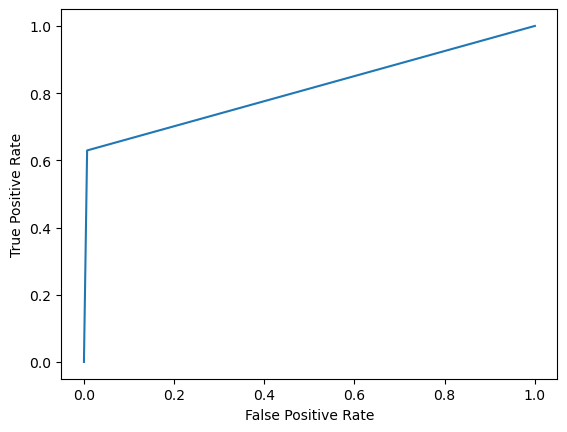

In [40]:
print('\nROC curve for Training data: \n')
fpr, tpr, _ = roc_curve(y_train, train_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


ROC curve for Test data: 



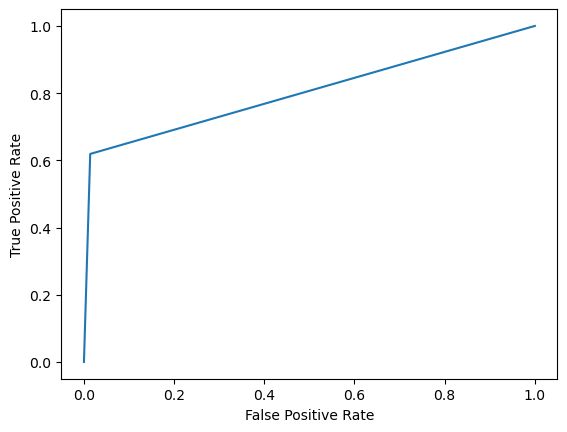

In [41]:
print('\nROC curve for Test data: \n')
fpr, tpr, _ = roc_curve(y_test, test_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [42]:
print('\nTraining Confusion Matrix\n')
confusion_matrix(y_train, train_pred)


Training Confusion Matrix



array([[283,   2],
       [ 63, 107]])

In [43]:
print('\nTest Confusion Matrix\n')
confusion_matrix(y_test, test_pred)


Test Confusion Matrix



array([[71,  1],
       [16, 26]])

In [44]:
print("COMPARISON OF RESULTS:")
print("\n")
print("Supervised Learning : LinearSVC")
print("Average Training Accuracy:", train_sup_learn)
print("Average Test Acuracy:", test_sup_learn)
print("\n")

print("Semi-Supervised Learning/ Self-training : LinearSVC")
print("Training Accuracy:", train_semi_sup)  
print("Average Test Acuracy:",test_semi_sup)
print("\n")

print("Unsupervised Learning : KMeans")
print("Average Training Accuracy:",train_unsup_learn) 
print("Average Test Acuracy:",test_unsup_learn) 
print("\n")

print("Spectral Clustering : SpectralClustering")
print("Average Training Accuracy:",train_spec)
print("Average Test Acuracy:",test_spec)

COMPARISON OF RESULTS:


Supervised Learning : LinearSVC
Average Training Accuracy: 0.9835535976505144
Average Test Acuracy: 0.9127536231884058


Semi-Supervised Learning/ Self-training : LinearSVC
Training Accuracy: 1.0805433186490458
Average Test Acuracy: 0.7672463768115944


Unsupervised Learning : KMeans
Average Training Accuracy: 0.923882783882784
Average Test Acuracy: 0.6388888888888888


Spectral Clustering : SpectralClustering
Average Training Accuracy: 0.6523809523809524
Average Test Acuracy: 0.668421052631579


We can observe that the training accuracy decreases in the order of Supervised -> Semi-Supervised -> Unsupervised learning.
In summary, supervised learning methods generally outperform unsupervised and semi-supervised methods in terms of accuracy on both training and test data. However, semi-supervised learning shows potential in leveraging both labeled and unlabeled data, while unsupervised methods struggle without labeled data.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set from:

https://archive.ics.
uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [49]:
data=pd.read_csv('../data/data_banknote_authentication.txt', header=None)

In [50]:
data

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,0:4], data.iloc[:,4:], test_size=0.344)

In [53]:
X_test

,0,1,2,3
1217,0.61652,3.89440,-4.7275,-4.394800
114,1.78190,6.91760,-1.2744,-1.575900
548,1.85330,6.14580,1.0176,-2.040100
1288,-2.65900,-1.60580,1.3647,0.164640
971,0.00312,-4.00610,1.7956,0.917220
...,...,...,...,...
481,2.82610,9.40070,-3.3034,-1.050900
314,1.18110,8.38470,-2.0567,-0.903450
1235,-3.53590,0.30417,0.6569,-0.295700
524,0.33111,4.57310,2.0570,-0.189670


In [54]:
Y_test

,4
1217,1
114,0
548,0
1288,1
971,1
...,...
481,0
314,0
1235,1
524,0


### (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

#### i Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L 1 penalty

In [55]:
iteration_error=[]

In [56]:
#passive learning
for i in range(50):
    svc_error=[]
    df1=pd.DataFrame()
    df2=pd.DataFrame()
    X=X_train.copy()
    Y=Y_train.copy()
    for j in range(89):
        X_sample, X_test_sample, Y_train_sample, Y_test_sample = train_test_split(X, Y, train_size=10/len(X), stratify = Y)
        df1 = pd.concat([df1, X_sample], ignore_index=True)
        df2 = pd.concat([df2, Y_train_sample], ignore_index=True)
        X.drop(list(X_sample.index), inplace = True)
        Y.drop(list(X_sample.index), inplace = True)

        #training the Linear SVM on the selected data
        param_grid_SVM={
        'C':np.logspace(-3,6,10),
        }
        gridSVM_L1 = GridSearchCV(estimator=LinearSVC(penalty='l1', loss='squared_hinge', dual=False, max_iter=100000), param_grid=param_grid_SVM, cv=5)
        gridSVM_L1.fit(df1, df2)
        svc_error.append(1-gridSVM_L1.score(X_test, Y_test.values.ravel()))
    gridSVM_L1.fit(X_train, Y_train)
    svc_error.append(1-gridSVM_L1.score(X_test, Y_test.values.ravel()))
    iteration_error.append(svc_error)
    print("iteration:", i)

        

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49


In [57]:
passive_learning_error = pd.DataFrame(iteration_error)

In [58]:
passive_learning_error

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.016949,0.057203,0.023305,0.057203,0.010593,0.025424,0.019068,0.012712,0.010593,0.010593,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
1,0.156780,0.161017,0.012712,0.042373,0.031780,0.012712,0.040254,0.029661,0.014831,0.019068,...,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.010593,0.010593
2,0.069915,0.065678,0.086864,0.031780,0.012712,0.016949,0.023305,0.014831,0.016949,0.016949,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
3,0.025424,0.019068,0.014831,0.012712,0.012712,0.025424,0.019068,0.016949,0.019068,0.012712,...,0.010593,0.010593,0.012712,0.012712,0.012712,0.010593,0.010593,0.010593,0.010593,0.010593
4,0.169492,0.161017,0.163136,0.012712,0.019068,0.019068,0.014831,0.019068,0.019068,0.014831,...,0.012712,0.012712,0.006356,0.006356,0.006356,0.012712,0.012712,0.012712,0.012712,0.010593
5,0.122881,0.099576,0.016949,0.012712,0.021186,0.021186,0.021186,0.012712,0.012712,0.012712,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.006356,0.006356,0.010593,0.010593,0.010593
6,0.173729,0.023305,0.019068,0.021186,0.021186,0.019068,0.023305,0.023305,0.023305,0.023305,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.010593,0.010593,0.012712,0.010593
7,0.154661,0.012712,0.014831,0.012712,0.010593,0.010593,0.010593,0.012712,0.012712,0.012712,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
8,0.317797,0.091102,0.029661,0.021186,0.021186,0.012712,0.012712,0.012712,0.012712,0.012712,...,0.008475,0.008475,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
9,0.163136,0.014831,0.014831,0.016949,0.012712,0.008475,0.010593,0.012712,0.012712,0.010593,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593


In [59]:
average_error_passive = pd.DataFrame(passive_learning_error.mean())

In [60]:
average_error_passive.rename(columns={0:"Average Error"}, inplace=True)

In [61]:
average_error_passive

,Average Error
0,0.119110
1,0.069407
2,0.054237
3,0.040042
4,0.028178
...,...
85,0.010636
86,0.010636
87,0.010508
88,0.010720


#### (ii) Active

In [62]:
for i in range(1):
    #taking the input data
    data = pd.read_csv('../data/data_banknote_authentication.txt', header = None)
    X=data.iloc[:,0:4]
    Y=data.iloc[:,4:]

    #using stratified shuffled split
    s_split=StratifiedShuffleSplit(n_splits=5, test_size=472,random_state=0)
    for train_index, test_index in s_split.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.loc[train_index], Y.loc[test_index]
    
    X_train=X_train.reset_index(drop=True)
    X_test=X_test.reset_index(drop=True)
    y_train=y_train.reset_index(drop=True)
    y_test=y_test.reset_index(drop=True)
    
    new_train = pd.DataFrame()
    test_errs = []
    full_train_data = pd.concat([X_train,y_train],axis=1)
    
    #taking first 10 training samples
    tr_sample = full_train_data.sample(n=10,replace=False)
         
    new_train = pd.concat([new_train,tr_sample], axis = 0)
   
    full_train_data.drop(index=tr_sample.index.tolist(),inplace=True)
    
    new_train_x= new_train.iloc[:,0:4]
    new_train_y= new_train.iloc[:,4:]

In [63]:
active_iteration_error=[]
final = pd.DataFrame()

for j in range(50):
    svc_error=[]
    data= pd.read_csv('../data/data_banknote_authentication.txt',names=['variance','skewness','kurtosis','entropy','class'])
    entire_test = data.sample(472,random_state=random.randint(0,100))
    test_ind = entire_test.index
    train_data = data.drop(index=test_ind)
    entire_test = entire_test.reset_index(drop=True)
    test_data_x = entire_test.drop('class',axis=1)
    test_data_y = entire_test['class'] 

    str_k = StratifiedKFold(n_splits=90)
    X_train_data= train_data.drop(['class'],axis=1)
    train_data_y = train_data['class']
    train_data_y = train_data_y.reset_index(drop=True)
    X_train_data = X_train_data.reset_index(drop=True)
 
    new_train=pd.DataFrame()
      
    for train_index,test_index in str_k.split(X_train_data,train_data_y):
        sample_x,sample_y=X_train_data.iloc[test_index], train_data_y.iloc[test_index]
        tr_sample_df= pd.concat([sample_x,sample_y],axis=1)
        new_train = pd.concat([new_train,tr_sample_df],axis=0)
        break
        
    for i in range(0,90):
        X_train_data= X_train_data.reset_index(drop=True)
        
        param_grid_SVM={
        'C':[0.01,0.1,1,10],
        }
        gridSVM_L1 = GridSearchCV(estimator=LinearSVC(penalty='l1', loss='squared_hinge', dual=False, max_iter=10000), param_grid=param_grid_SVM, cv=5)
        gridSVM_L1.fit(new_train_x,new_train_y)
        
        #finding the closest 10 points to the hyperplane
        closest_data = (gridSVM_L1.decision_function(X_train_data))
        closest_data=np.abs(closest_data)
        distances =  pd.DataFrame(closest_data)
        distances = distances.sort_values(0)
        distances = distances.iloc[0:10,]
        distances_index = distances.index
        
        tr_sample  =  train_data.iloc[distances_index,:]
        X_train_data= X_train_data.drop(index = distances_index)
        
        #adding the new 10 points to the training pool
        new_train = pd.concat([new_train,tr_sample],axis=0)
        new_train.reset_index(drop=True,inplace=True)
        new_train_x = new_train.drop('class',axis=1)
        new_train_y = new_train['class']

        #calculating the test error
        svc_error.append(1-gridSVM_L1.score(test_data_x, test_data_y))
    print("iteration:", j)
    active_iteration_error.append(svc_error)        

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49


In [64]:
active_learning_error = pd.DataFrame(active_iteration_error)

In [65]:
active_learning_error

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.137712,0.023305,0.019068,0.014831,0.023305,0.021186,0.036017,0.021186,0.021186,0.021186,...,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237
1,0.008475,0.112288,0.029661,0.031780,0.031780,0.027542,0.027542,0.016949,0.004237,0.004237,...,0.006356,0.004237,0.006356,0.006356,0.004237,0.004237,0.006356,0.006356,0.006356,0.006356
2,0.006356,0.008475,0.008475,0.008475,0.014831,0.014831,0.008475,0.014831,0.014831,0.010593,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
3,0.000000,0.095339,0.091102,0.016949,0.016949,0.031780,0.016949,0.016949,0.016949,0.016949,...,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
4,0.010593,0.010593,0.006356,0.010593,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,...,0.008475,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
5,0.004237,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.014831,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
6,0.008475,0.021186,0.019068,0.012712,0.012712,0.012712,0.012712,0.012712,0.014831,0.014831,...,0.014831,0.014831,0.014831,0.014831,0.010593,0.010593,0.010593,0.014831,0.010593,0.010593
7,0.012712,0.139831,0.008475,0.004237,0.008475,0.008475,0.008475,0.008475,0.023305,0.012712,...,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.008475
8,0.010593,0.006356,0.006356,0.023305,0.006356,0.040254,0.029661,0.029661,0.023305,0.029661,...,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.006356,0.006356,0.006356
9,0.008475,0.044492,0.014831,0.019068,0.021186,0.008475,0.008475,0.019068,0.019068,0.014831,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475


### ((c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

In [66]:
average_error_active = pd.DataFrame(active_learning_error.mean())

In [67]:
average_error_active.rename(columns={0:"Average Error"}, inplace=True)

In [68]:
average_error_active

,Average Error
0,0.012458
1,0.125551
2,0.059237
3,0.034280
4,0.034195
...,...
85,0.010508
86,0.010339
87,0.010593
88,0.010636


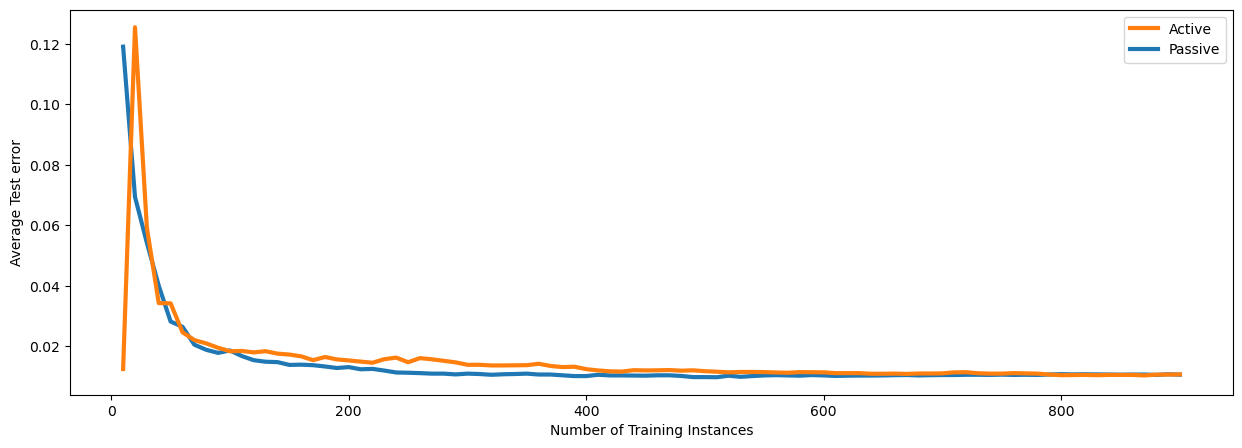

In [69]:
plt.figure(figsize=(15, 5))
number_samples=list(range(10,901,10))
passive, = plt.plot(number_samples, np.array(average_error_passive), label='Passive',linewidth=3)
active, = plt.plot(number_samples, np.array(average_error_active), label='Active',linewidth=3)
plt.legend(handles=[active,passive])
plt.ylabel('Average Test error')
plt.xlabel('Number of Training Instances')
plt.show()

Active Learning reaches the minimum test error faster than passive learning

References:
- https://scikit-learn.org/stable/modules/cross_validation.html
- https://www.geeksforgeeks.org/ml-spectral-clustering/
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
- https://www.dataquest.io/blog/learning-curves-machine-learning/